First few rows of the dataset:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Missing values in the dataset:
Category    0
Message     0
dtype: int64

Distribution of spam vs. non-spam messages:
Category
ham     4825
spam     747
Name: count, dtype: int64


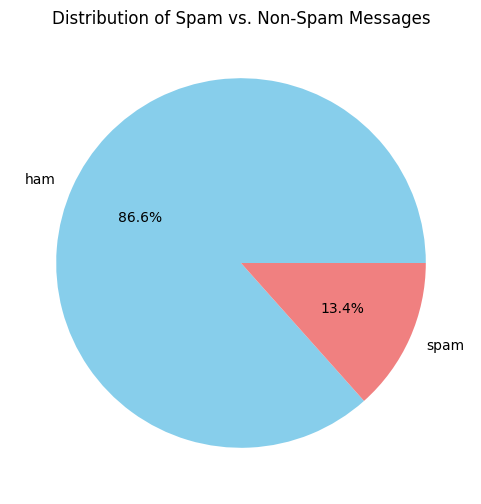

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab_Notebooks/spam.csv'
data = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

# Check for any missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Explore the distribution of spam vs. non-spam messages
print("\nDistribution of spam vs. non-spam messages:")
print(data['Category'].value_counts())

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
data['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Spam vs. Non-Spam Messages')
plt.ylabel('')
plt.show()


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
data['Tokenized_Message'] = data['Message'].apply(lambda x: word_tokenize(x.lower()))

# Display the first few rows of the dataset with tokenized messages
print("First few rows of the dataset with tokenized messages:")
print(data[['Message', 'Tokenized_Message']].head())

First few rows of the dataset with tokenized messages:
                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                   Tokenized_Message  
0  [go, until, jurong, point, ,, crazy, .., avail...  
1           [ok, lar, ..., joking, wif, u, oni, ...]  
2  [free, entry, in, 2, a, wkly, comp, to, win, f...  
3  [u, dun, say, so, early, hor, ..., u, c, alrea...  
4  [nah, i, do, n't, think, he, goes, to, usf, ,,...  


In [ ]:
import string

# Define a function to remove punctuation from a list of words
def remove_punctuation(tokens):
    return [word for word in tokens if word not in string.punctuation]

# Apply the remove_punctuation function to each tokenized message
data['Tokenized_Message_No_Punct'] = data['Tokenized_Message'].apply(remove_punctuation)

# Print the result
print("Tokenized messages with punctuation removed:")
print(data['Tokenized_Message_No_Punct'].head())


Tokenized messages with punctuation removed:
0    [go, until, jurong, point, crazy, .., availabl...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, ..., u, c, alrea...
4    [nah, i, do, n't, think, he, goes, to, usf, he...
Name: Tokenized_Message_No_Punct, dtype: object


In [ ]:
from collections import Counter

# Flatten the list of tokenized words
all_words = [word for sublist in data['Tokenized_Message'] for word in sublist]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the top 5 most common words
top_5_words = word_counts.most_common(5)

# Print the top 5 most common words
print("Top 5 most common words:")
for word, count in top_5_words:
    print(f"{word}: {count}")


Top 5 most common words:
.: 4725
i: 2918
to: 2249
you: 2235
,: 1938


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Define a function to remove stop words and perform stemming
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    # Perform stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

# Apply preprocessing to each message
data['Processed_Message'] = data['Message'].apply(preprocess_text)

# Print the result
print("Messages after stop words removal and stemming:")
print(data['Processed_Message'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Messages after stop words removal and stemming:
0    [go, jurong, point, ,, crazi, .., avail, bugi,...
1               [ok, lar, ..., joke, wif, u, oni, ...]
2    [free, entri, 2, wkli, comp, win, fa, cup, fin...
3    [u, dun, say, earli, hor, ..., u, c, alreadi, ...
4    [nah, n't, think, goe, usf, ,, live, around, t...
Name: Processed_Message, dtype: object


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from collections import Counter

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Define a function to remove stop words, punctuation, and perform stemming
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and punctuation
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english') and word not in string.punctuation]
    # Perform stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

# Apply preprocessing to each message
data['Processed_Message'] = data['Message'].apply(preprocess_text)

# Flatten the list of processed words
all_processed_words = [word for sublist in data['Processed_Message'] for word in sublist]

# Count the occurrences of each word
processed_word_counts = Counter(all_processed_words)

# Get the top 10 most common words
top_10_processed_words = processed_word_counts.most_common(10)

# Print the top 10 most common words
print("Top 10 most common words after preprocessing:")
for word, count in top_10_processed_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 most common words after preprocessing:
...: 1146
u: 1146
..: 697
call: 655
's: 494
2: 489
go: 455
get: 447
'm: 395
ur: 391


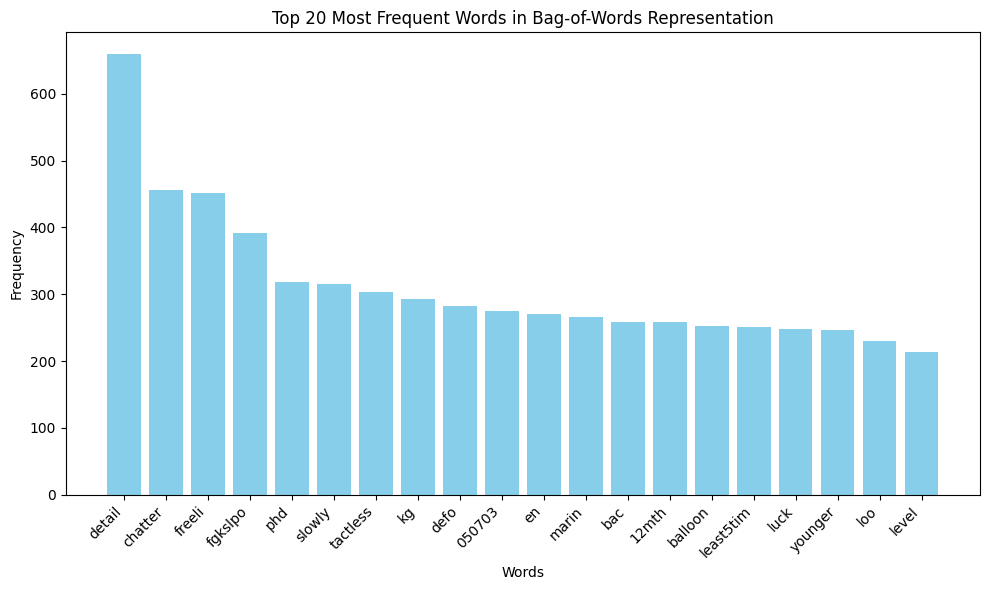

Bag-of-Words Representation:
  (0, 3111)	1
  (0, 3799)	1
  (0, 5146)	1
  (0, 2086)	1
  (0, 1239)	1
  (0, 1631)	1
  (0, 3189)	1
  (0, 7277)	1
  (0, 3910)	1
  (0, 1629)	1
  (0, 1873)	1
  (0, 3151)	1
  (0, 1047)	1
  (0, 7092)	1
  (1, 4790)	1
  (1, 3942)	1
  (1, 3765)	1
  (1, 7197)	1
  (1, 4816)	1
  (2, 2944)	1
  (2, 2605)	2
  (2, 7242)	1
  (2, 1971)	1
  (2, 7208)	1
  (2, 2725)	2
  :	:
  (5567, 4712)	1
  (5568, 3111)	1
  (5568, 3410)	1
  (5568, 7430)	1
  (5568, 2932)	1
  (5568, 2636)	1
  (5569, 6321)	1
  (5569, 4453)	1
  (5569, 5087)	1
  (5570, 2944)	1
  (5570, 7127)	1
  (5570, 4024)	1
  (5570, 4632)	1
  (5570, 6921)	1
  (5570, 6064)	1
  (5570, 1658)	1
  (5570, 2562)	1
  (5570, 3038)	1
  (5570, 3233)	1
  (5570, 3631)	1
  (5570, 902)	1
  (5570, 1452)	1
  (5571, 4551)	1
  (5571, 6762)	1
  (5571, 5604)	1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer to the preprocessed messages and transform them into a bag-of-words representation
bag_of_words = vectorizer.fit_transform(data['Processed_Message'].apply(lambda x: ' '.join(x)))

# Visualize the bag-of-words representation
# Get the vocabulary (unique words) and their corresponding counts
word_counts = list(zip(vectorizer.vocabulary_.keys(), bag_of_words.sum(axis=0).tolist()[0]))
word_counts.sort(key=lambda x: x[1], reverse=True)  # Sort words by frequency
top_words = word_counts[:20]  # Get the top 20 most frequent words

# Plot the top 20 most frequent words
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_words)), [count for word, count in top_words], align='center', color='skyblue')
plt.xticks(range(len(top_words)), [word for word, count in top_words], rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Bag-of-Words Representation')
plt.tight_layout()
plt.show()

# Describe Bag-of-Words
print("Bag-of-Words Representation:")
print(bag_of_words)


In [ ]:
pip install wordcloud


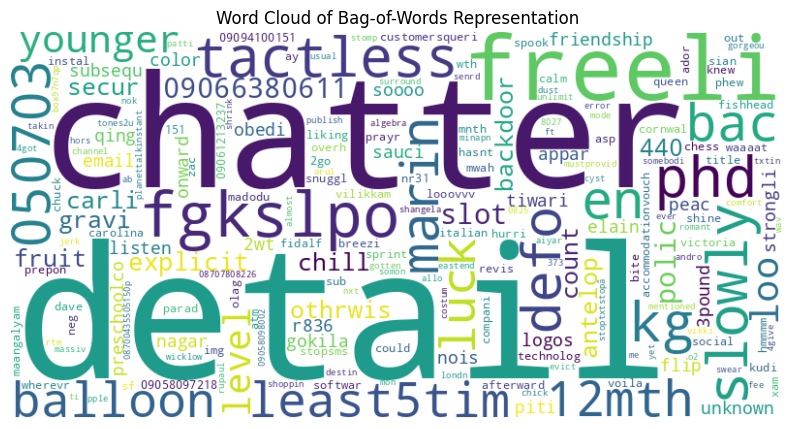

In [ ]:
from wordcloud import WordCloud

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bag-of-Words Representation')
plt.show()


In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=1d35a62ef8f90a356dddb2eec83e1bc7e8f48b6eb688a35797271202b0e61c05
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect
import numpy as np

# Function to detect non-English words in a message
def detect_non_english_words(message):
    non_english_count = 0
    for word in message:
        try:
            if detect(word) != 'en':  # Check if the word is not in English
                non_english_count += 1
        except:
            pass  # Handle any errors that might occur during language detection
    return non_english_count

# Apply the function to each preprocessed message
data['Non_English_Count'] = data['Processed_Message'].apply(detect_non_english_words)

# Create a binary feature indicating whether the message contains non-English words
data['Contains_Non_English'] = np.where(data['Non_English_Count'] > 0, 1, 0)

# Concatenate TF-IDF vectors and the new feature
# Assuming tfidf_matrix is already defined from previous code
tfidf_with_non_english = np.hstack((tfidf_matrix.toarray(), data['Contains_Non_English'].values.reshape(-1, 1)))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_with_non_english, data['Category'], test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.957847533632287
Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       966
        spam       1.00      0.68      0.81       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [ ]:
from langdetect import detect
import numpy as np
from sklearn.model_selection import cross_val_score

# Function to detect non-English words in a message
def detect_non_english_words(message):
    non_english_count = 0
    for word in message:
        try:
            if detect(word) != 'en':  # Check if the word is not in English
                non_english_count += 1
        except:
            pass  # Handle any errors that might occur during language detection
    return non_english_count

# Apply the function to each preprocessed message
data['Non_English_Count'] = data['Processed_Message'].apply(detect_non_english_words)

# Create a binary feature indicating whether the message contains non-English words
data['Contains_Non_English'] = np.where(data['Non_English_Count'] > 0, 1, 0)

# Concatenate TF-IDF vectors and the new feature
# Assuming tfidf_matrix is already defined from previous code
tfidf_with_non_english = np.hstack((tfidf_matrix.toarray(), data['Contains_Non_English'].values.reshape(-1, 1)))
X = tfidf_with_non_english
y = data['Category']

# Initialize logistic regression model
logistic_regression = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(logistic_regression, X, y, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.95426009 0.95695067 0.95691203 0.95332136 0.95601436]
Mean CV Accuracy: 0.9554917036333336


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_with_non_english, data['Category'], test_size=0.2, random_state=42)

# Initialize logistic regression model
logistic_regression = LogisticRegression()

# Train the logistic regression model
logistic_regression.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.957847533632287
Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       966
        spam       1.00      0.68      0.81       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

